In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

In [2]:
# Загрузка данных
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv"
data = pd.read_csv(url)

# Сохранение данных в локальный файл
data.to_csv('online_shoppers.csv', index=False)
print("Данные загружены и сохранены в 'online_shoppers.csv'.")

Данные загружены и сохранены в 'online_shoppers.csv'.


Столбцы и типы данных:
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Распределение Revenue:
Revenue
False    0.845255
True     0.154745
Name: proportion, dtype: float64

Пропущенные значения:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRa

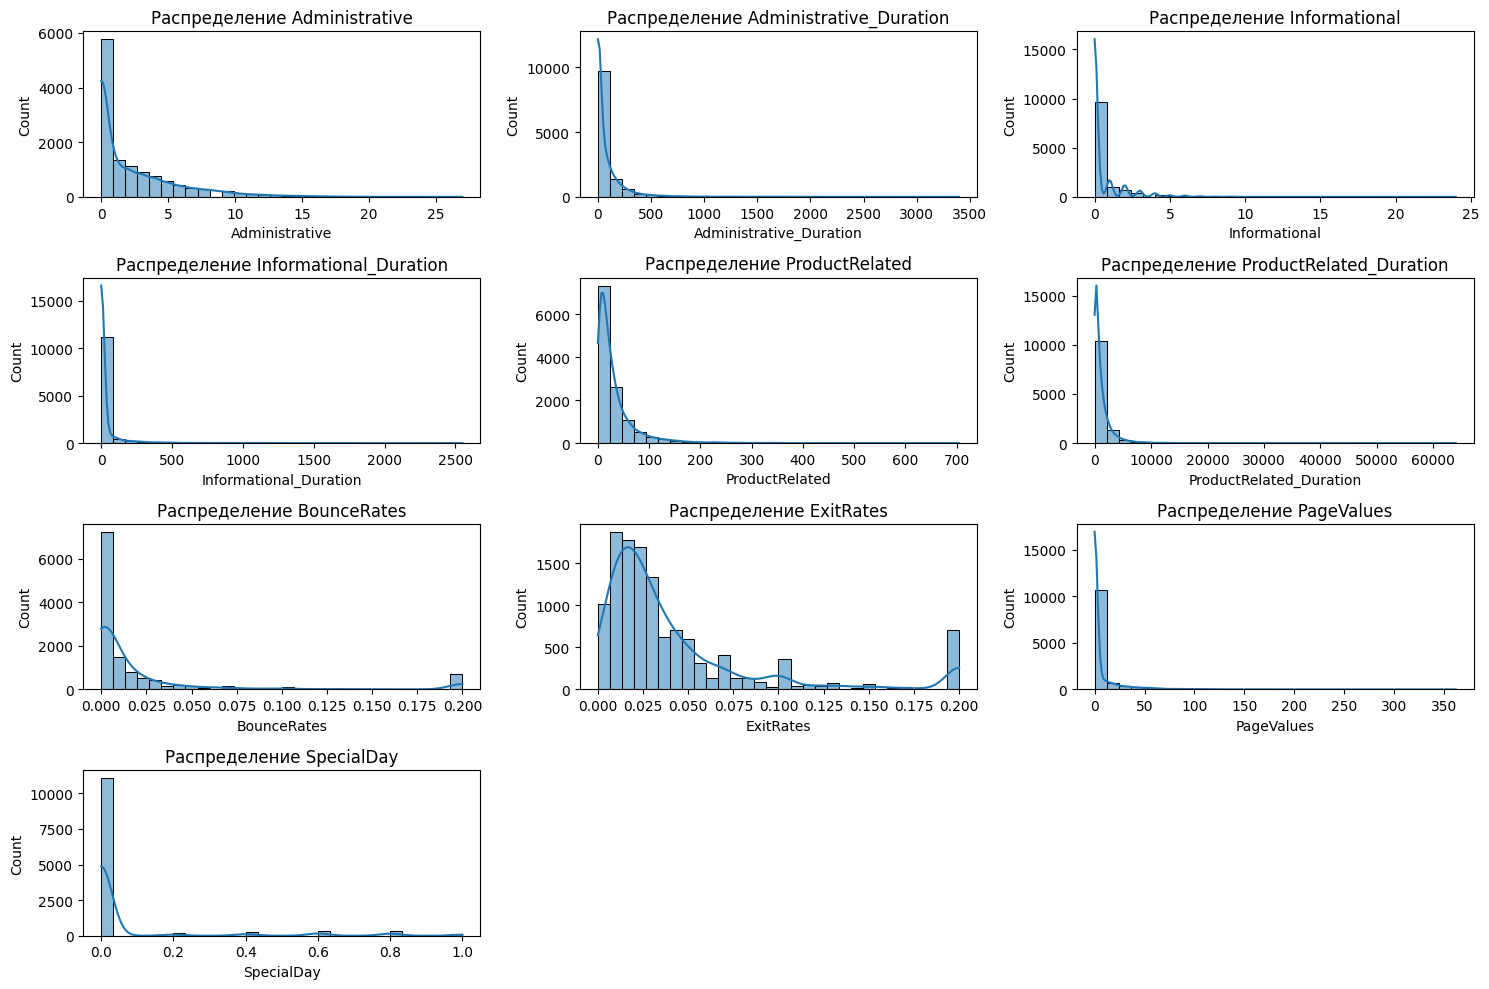

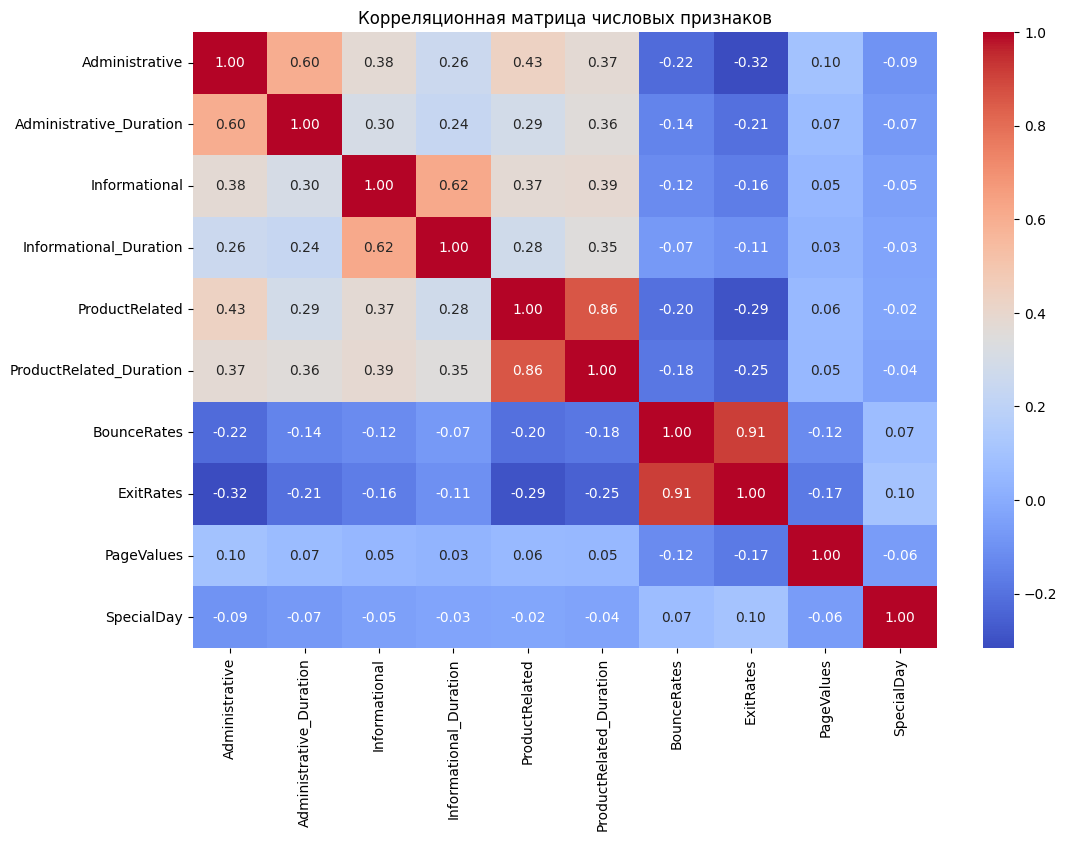

In [3]:
# Проверка структуры данных
print("Столбцы и типы данных:")
print(data.dtypes)

# Распределение целевой переменной
print("\nРаспределение Revenue:")
print(data['Revenue'].value_counts(normalize=True))

# Проверка на пропуски и дубликаты
print("\nПропущенные значения:")
print(data.isnull().sum())
print("\nКоличество дубликатов:", data.duplicated().sum())

# Визуализация распределения числовых признаков
numerical_cols = ['Administrative', 'Administrative_Duration', 'Informational', 
                  'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
                  'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Распределение {col}')
plt.tight_layout()
plt.show()

# Корреляционная матрица
plt.figure(figsize=(12, 8))
corr_matrix = data[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица числовых признаков')
plt.show()

In [4]:
# Удаление дубликатов
data = data.drop_duplicates()

# Сохранение очищенных данных
data.to_csv('cleaned_data.csv', index=False)
print("Данные очищены и сохранены в 'cleaned_data.csv'.")

Данные очищены и сохранены в 'cleaned_data.csv'.


In [5]:
# Загрузка очищенных данных
data = pd.read_csv('cleaned_data.csv')

# Кодирование категориальных признаков
data_encoded = pd.get_dummies(data, columns=['Month', 'VisitorType', 'Weekend'], drop_first=True)

# Масштабирование числовых признаков
numerical_cols = ['Administrative_Duration', 'Informational_Duration', 
                  'ProductRelated_Duration', 'BounceRates', 'ExitRates', 
                  'PageValues', 'SpecialDay']
scaler = StandardScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Разделение данных
X = data_encoded.drop('Revenue', axis=1)
y = data_encoded['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print("Предобработка данных завершена.")
print("Размеры выборок:")
print("Train:", X_train.shape)
print("Test:", X_test.shape)

Предобработка данных завершена.
Размеры выборок:
Train: (8543, 26)
Test: (3662, 26)


In [6]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Gradient Boosting:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

cv_scores = cross_val_score(gb_model, X, y, cv=5, scoring='f1')
print(f"Кросс-валидация (5 фолдов) - Средний F1-score: {cv_scores.mean():.4f}")
print(f"Стандартное отклонение: {cv_scores.std():.4f}")

Gradient Boosting:
Accuracy: 0.9052
Precision: 0.7339
Recall: 0.6171
F1-score: 0.6705
Кросс-валидация (5 фолдов) - Средний F1-score: 0.6453
Стандартное отклонение: 0.0363


In [7]:
# CatBoost
cb_model = CatBoostClassifier(random_state=42, verbose=0)
cb_model.fit(X_train, y_train)
y_pred = cb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("CatBoost:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

cv_scores = cross_val_score(cb_model, X, y, cv=5, scoring='f1')
print(f"Кросс-валидация (5 фолдов) - Средний F1-score: {cv_scores.mean():.4f}")
print(f"Стандартное отклонение: {cv_scores.std():.4f}")

CatBoost:
Accuracy: 0.9050
Precision: 0.7373
Recall: 0.6084
F1-score: 0.6667
Кросс-валидация (5 фолдов) - Средний F1-score: 0.6408
Стандартное отклонение: 0.0502


In [8]:
# AdaBoost
ab_model = AdaBoostClassifier(random_state=42)
ab_model.fit(X_train, y_train)
y_pred = ab_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("AdaBoost:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

cv_scores = cross_val_score(ab_model, X, y, cv=5, scoring='f1')
print(f"Кросс-валидация (5 фолдов) - Средний F1-score: {cv_scores.mean():.4f}")
print(f"Стандартное отклонение: {cv_scores.std():.4f}")

AdaBoost:
Accuracy: 0.8935
Precision: 0.6835
Recall: 0.5927
F1-score: 0.6348
Кросс-валидация (5 фолдов) - Средний F1-score: 0.5805
Стандартное отклонение: 0.0571


In [9]:
# LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("LightGBM:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

cv_scores = cross_val_score(lgb_model, X, y, cv=5, scoring='f1')
print(f"Кросс-валидация (5 фолдов) - Средний F1-score: {cv_scores.mean():.4f}")
print(f"Стандартное отклонение: {cv_scores.std():.4f}")

[LightGBM] [Info] Number of positive: 1336, number of negative: 7207
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1897
[LightGBM] [Info] Number of data points in the train set: 8543, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.156385 -> initscore=-1.685373
[LightGBM] [Info] Start training from score -1.685373
LightGBM:
Accuracy: 0.9055
Precision: 0.7325
Recall: 0.6224
F1-score: 0.6730
[LightGBM] [Info] Number of positive: 1527, number of negative: 8237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1899
[LightGBM] [Info] Number of data points

In [10]:
# XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("XGBoost:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='f1')
print(f"Кросс-валидация (5 фолдов) - Средний F1-score: {cv_scores.mean():.4f}")
print(f"Стандартное отклонение: {cv_scores.std():.4f}")

XGBoost:
Accuracy: 0.8976
Precision: 0.7056
Recall: 0.5909
F1-score: 0.6432
Кросс-валидация (5 фолдов) - Средний F1-score: 0.6315
Стандартное отклонение: 0.0633


[LightGBM] [Info] Number of positive: 1336, number of negative: 7207
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1897
[LightGBM] [Info] Number of data points in the train set: 8543, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.156385 -> initscore=-1.685373
[LightGBM] [Info] Start training from score -1.685373
               Model  Accuracy  Precision    Recall  F1-score
0  Gradient Boosting  0.905243   0.733888  0.617133  0.670465
1           AdaBoost  0.893501   0.683468  0.592657  0.634831
2           CatBoost  0.904970   0.737288  0.608392  0.666667
3           LightGBM  0.905516   0.732510  0.622378  0.672968
4            XGBoost  0.897597   0.705637  0.590909  0.643197


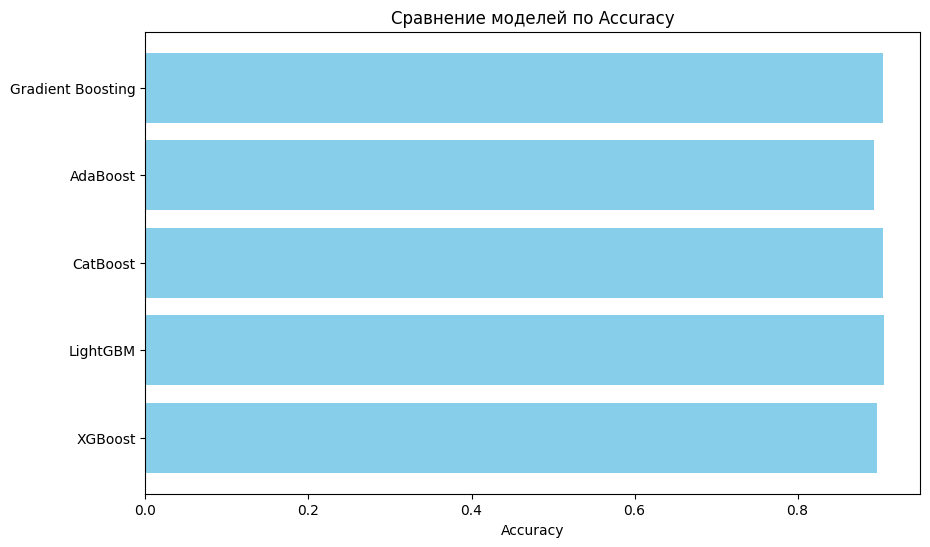

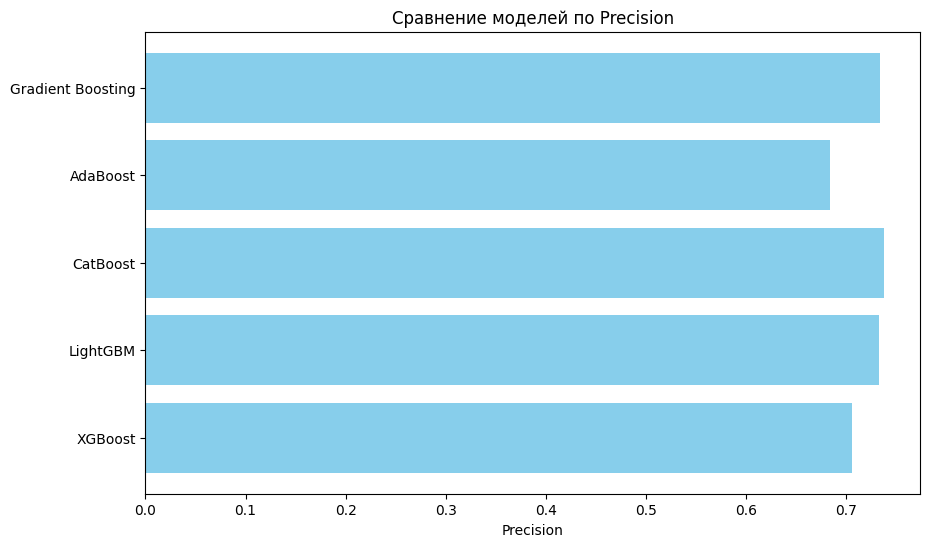

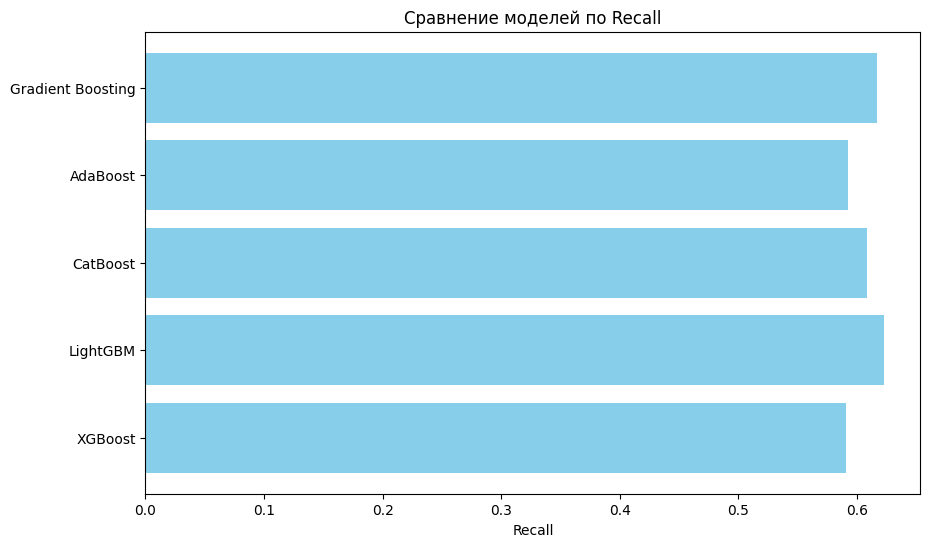

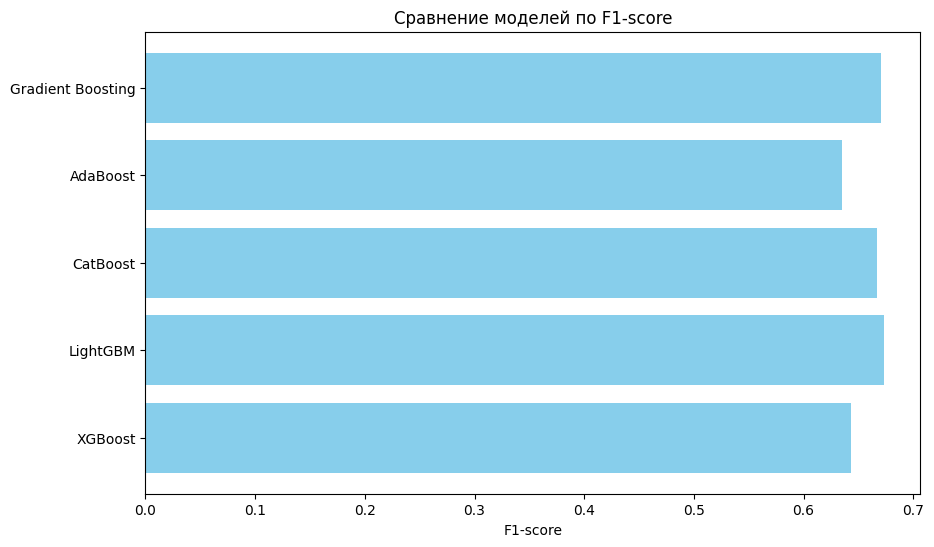

In [11]:
# Сравнение моделей
models = {
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0),
    "LightGBM": lgb.LGBMClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42, eval_metric='logloss')
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append([name, accuracy, precision, recall, f1])

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])
print(results_df)

# Визуализация
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.barh(results_df['Model'], results_df[metric], color='skyblue')
    plt.xlabel(metric)
    plt.title(f'Сравнение моделей по {metric}')
    plt.gca().invert_yaxis()
    plt.show()

In [12]:
# Лучшая модель: LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Лучшая модель: LightGBM")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Сохранение модели
joblib.dump(lgb_model, 'lightgbm_model.pkl')
print("Модель LightGBM сохранена в файл 'lightgbm_model.pkl'.")

[LightGBM] [Info] Number of positive: 1336, number of negative: 7207
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1897
[LightGBM] [Info] Number of data points in the train set: 8543, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.156385 -> initscore=-1.685373
[LightGBM] [Info] Start training from score -1.685373
Лучшая модель: LightGBM
Accuracy: 0.9055
Precision: 0.7325
Recall: 0.6224
F1-score: 0.6730
Модель LightGBM сохранена в файл 'lightgbm_model.pkl'.
